TensorFrost module loaded!
test:
  Kernel count: 2
  Intermediate buffers: 0
  Host readbacks: 0
  Host writes: 0
  Lines of generated code: 537
  IR Compile time: 3.752700 ms
  Steps time: 1513.760132 ms

(32, 32, 3)


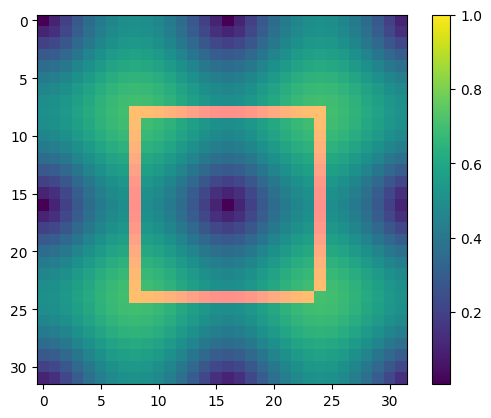

In [1]:
import TensorFrost as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import imageio
import cv2 as cv
from IPython.display import Image
from IPython.display import Video
import os

tf.initialize(tf.cpu, "/O2 /fp:fast /openmp")

def test():
    canvas = tf.buffer([32, 32, 3], tf.float32)

    i,j = tf.indices([32, 32])
    x, y = tf.float(i), tf.float(j)
    x, y = x/32.0, y/32.0

    vx = tf.sin(2.0*3.141592*x)
    vy = tf.sin(2.0*3.141592*y)
    mag = 0.5*tf.sqrt(vx*vx + vy*vy)

    mag = tf.clamp(mag, 0.0, 1.0)
    canvas[i, j, 0] = (0.277 + mag * (0.105 + mag * (-0.330 + mag * (-4.634 + mag * (6.228 + mag * (4.776 - 5.435 * mag))))))
    canvas[i, j, 1] = (0.005 + mag * (1.404 + mag * (0.214 + mag * (-5.799 + mag * (14.179 + mag * (-13.745 + 4.645 * mag))))))
    canvas[i, j, 2] = (0.334 + mag * (1.384 + mag * (0.095 + mag * (-19.332 + mag * (56.690 + mag * (-65.353 + 26.312 * mag))))))

    a, = tf.indices([16])
    canvas[a+8, 8, 0] = 1.0
    canvas[8, a+8, 0] = 1.0
    canvas[a+8, 24, 0] = 1.0
    canvas[24, a+8, 0] = 1.0
    return canvas


t1 = tf.compile(test)

res = t1()
resnp = res.numpy
print(resnp.shape)
#plot the result
plt.imshow(resnp)
plt.colorbar()
plt.show()